<a href="https://colab.research.google.com/github/KaterinaGalisheva/Homework/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                     **Добро пожаловать в мой первый проект GOOGLE COLAB**

Google Colab — это бесплатная облачная платформа от Google для машинного обучения и анализа данных. Она позволяет выполнять код на Python в браузере с использованием облачных ресурсов.
---
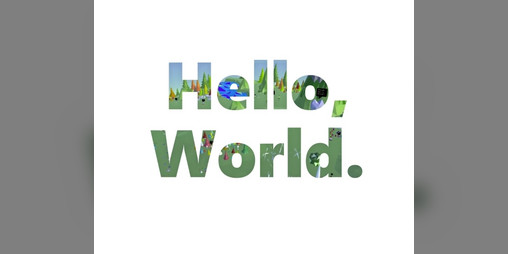

Вставьте новую кодовую ячейку и выполните следующий код, чтобы убедиться, что среда работает:

In [1]:
print("Hello, Google Colab!")

Hello, Google Colab!


Создайте список из 10 случайных чисел.
Напишите функцию, которая возвращает сумму чисел в списке.
Вызовите функцию и выведите результат на экран.

In [6]:
from random import randint

rand_list = []
for i in range(10):
  i = randint(1, 50)
  rand_list.append(i)

def rand_sum (*args):
  return sum(*args)


print(rand_sum(rand_list))

311


Установите библиотеку numpy (если она не установлена):

In [7]:
!pip install numpy

Импортируйте библиотеку numpy и создайте массив из 20 случайных чисел.
Вычислите среднее значение массива и выведите его на экран.

In [10]:
import numpy

random_ints = numpy.random.rand(20)

agv_rand_ints = rand_sum(random_ints)/len(random_ints)

print(agv_rand_ints)

0.5182830671921519


Загрузите любой CSV файл из интернета в ваш Google Colab.
Используйте библиотеку pandas для чтения CSV файла и выведите первые 5 строк данных.


In [19]:
import pandas

path = 'sample4.csv'
data = pandas.read_csv(path)

print(data.head())

   Game Number   "Game Length"
0            1              30
1            2              29
2            3              31
3            4              16
4            5              24


Установите библиотеку matplotlib (если она не установлена):

In [12]:
!pip install matplotlib

Постройте простой график на основе данных из вашего CSV файла.

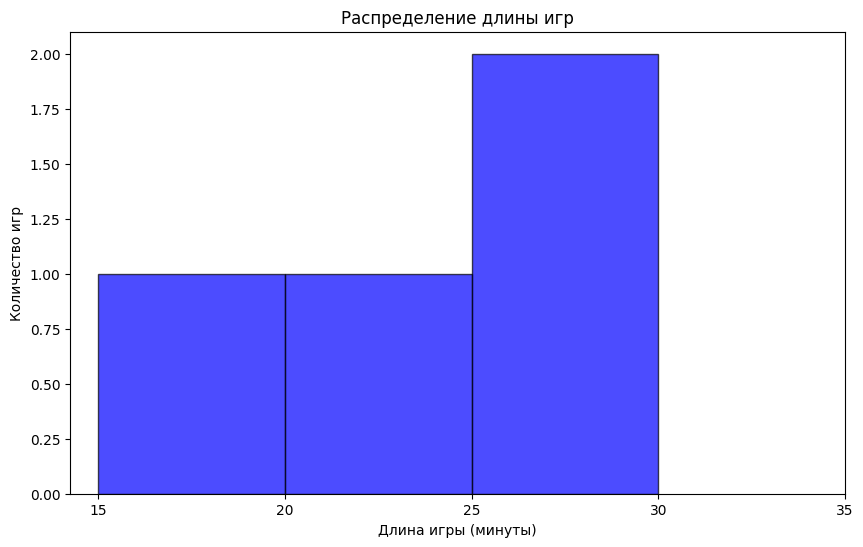

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(data['Game Length'], bins=range(15, 35, 5), alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(15, 36, 5))
plt.xlabel('Длина игры (минуты)')
plt.ylabel('Количество игр')
plt.title('Распределение длины игр')
plt.show()

Скопируйте код генетического алгоритма из лекционного блокнота.
Запустите его, изучите работу кода.
Измените значение целевой переменной TARGET. Добейтесь (увеличивая при необходимости число итераций обучения) полного соответствия "нового индивида целевой переменной".


In [29]:
import random

# Количество особей в каждом поколении
POPULATION_SIZE = 100

# Валидные гены
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Целевая строка для генерации
TARGET = "Mundus vult decipi, ergo decipiatur"

class Individual(object):
	'''
	Класс, представляющий отдельную особь (индивида) в популяции
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		Создаем случайные гены для мутации
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		Создаем хромосому или набор генов
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def gene_transfer(self, par2):
		'''
		Передаем гены новому поколению индивидов
		'''

		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			# если вероятность меньше 0,45, берем ген
			# от родителя 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# если вероятность между 0.45 и 0.90, берем
			# ген от родителя 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# в противном случае берем случайный ген (мутация),
			else:
				child_chromosome.append(self.mutated_genes())


		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Рассчитываем показатель соответствия, это количество
		символов в строке, которые отличаются от целевой
		строки.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#Текущее поколение
	generation = 1

	found = False
	population = []

	# Новое поколение
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# Отсортируем популяцию в порядке возрастания оценки соответствия целевой функции
		population = sorted(population, key = lambda x:x.fitness)

		# Если у нас появился индивид, достигший целевой функции
		# цикл совершенствования можно прервать
		if population[0].fitness <= 0:
			found = True
			break

		# В противном случае - продолжаем создавать новые поколения
		new_generation = []

		# Определяем 10% популяции, наиболее соответствующих целевой фукнции
		# чтобы передать их гены будущим поколениям
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])


		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.gene_transfer(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()


Generation: 1	String: 
3k_mQF.Aqtr8fc/f,c;VUupfz7Ed&T1-k/	Fitness: 33
Generation: 2	String: i3kC?5FoActr"fc;f,c;e-u!fzA}d
R1_;8	Fitness: 32
Generation: 3	String: MN"eufn}Eh_gk0PaRmF ?Zno9P}{:WvBk,@	Fitness: 31
Generation: 4	String: aWnnLO Q-Tt1q
EA/Db NU3pZ2Qc%&NESyW	Fitness: 30
Generation: 5	String: (8keuin-Qctg)Ecafmc e-4oRh&{MWP1_,8	Fitness: 29
Generation: 6	String: (8keuin-Qctg)Ecafmc e-4oRh&{MWP1_,8	Fitness: 29
Generation: 7	String: MQUt7Y (vl. [e
dEg&$4RY1xd7crhXahy2	Fitness: 27
Generation: 8	String: ME""?Oz:vlCcQMc#
gc ezxkfPeci&"Ptv8	Fitness: 26
Generation: 9	String: ME""?Oz:vlCcQMc#
gc ezxkfPeci&"Ptv8	Fitness: 26
Generation: 10	String: M]nC?O#bDll lecByNU e26oBHec9&d)tu$	Fitness: 22
Generation: 11	String: M]nC?O#bDll lecByNU e26oBHec9&d)tu$	Fitness: 22
Generation: 12	String: M]nC?O#bDll lecByNU e26oBHec9&d)tu$	Fitness: 22
Generation: 13	String: M]n"?O40AllczecF;Nc e2go,Heci&d)tu$	Fitness: 21
Generation: 14	String: M]n"?O40AllczecF;Nc e2go,Heci&d)tu$	Fitness: 21
Generation: 15	